In [1]:
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.express as px
%matplotlib inline

In [2]:
#create path to files
csvpath = Path("health-facilities-gh.csv")
csvpath_1 = Path("health-facility-tiers.csv")

In [3]:
#read csv file 
health_df = pd.read_csv(csvpath)
health_tiers_df = pd.read_csv(csvpath_1)

In [4]:
health_df

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.408010,-1.963170
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.463120,-1.585920
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.223930,-1.349820
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.841770,-1.610980
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.841770,-1.610980
...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,6.041831,-2.875169
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,6.041831,-2.875169
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,6.041831,-2.875169
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,6.041831,-2.875169


In [5]:
health_tiers_df

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2
...,...,...,...
1470,Upper East,TEMPANE COMMUNITY CLINIC,3
1471,Upper East,M.A. MODERN CLINIC,3
1472,Upper East,VALERIA CLINIC,3
1473,Upper East,QUALITY MEDICAL CENTRE,3


In [6]:
health_df.groupby('Type').size().sort_values(ascending=False)


Type
Clinic                             1171
Health Centre                       786
CHPS                                652
Maternity Home                      369
Hospital                            277
RCH                                 152
District Health Directorate          99
District Hospital                    82
Training Institution                 74
Others                               31
Polyclinic                           16
Regional Hospital                     9
Regional Health Directorate           9
Municipal Health Directorate          7
Municipal Hospital                    4
Teaching Hospital                     3
Psychiatric Hospital                  3
Research Institution                  2
clinic                                2
Metropolitan Health Directorate       2
Centre                                2
CPHS                                  1
Metropolitan Hospital                 1
DHD                                   1
Municipal  Health Directorate      

In [7]:
#Creating an Array for Type
group_clinic = ['Clinic', 'clinic','Polyclinic']
group_centre = ['Centre', 'Health Centre']
group_cphs = ['CPHS', 'CHPS']
group_ghs = ['Municipal Health Directorate', 'Municipal Hospital', 'Regional Hospital', 'Regional Health Directorate', 'District Hospital', 'District Health Directorate', 'Metropolitan Hospital', 'Metropolitan Health Directorate']
group_hospital = ['Hospital', 'Psychiatric Hospital']
group_maternity = ['Maternity Home', 'RCH', 'DHD']
group_teaching = ['Training Institution', 'Teaching Hospital', 'Research Institution']
group_other = ['Others']

health_df['Type']= health_df['Type'].replace(group_clinic, 'Clinic')
health_df['Type']= health_df['Type'].replace(group_centre, 'Health Centre')
health_df['Type']= health_df['Type'].replace(group_cphs, 'CHPS')
health_df['Type']= health_df['Type'].replace(group_ghs, 'GHS')
health_df['Type']= health_df['Type'].replace(group_hospital, 'Hospital')
health_df['Type']= health_df['Type'].replace(group_maternity, 'Maternity')
health_df['Type']= health_df['Type'].replace(group_teaching, 'Teaching')
health_df['Type']= health_df['Type'].replace(group_other, 'Other')

health_df.groupby('Type').size().sort_values()


Type
Municipal  Health Directorate       1
Other                              31
Teaching                           79
GHS                               213
Hospital                          280
Maternity                         522
CHPS                              653
Health Centre                     788
Clinic                           1189
dtype: int64

In [8]:
health_df.groupby('Ownership').size().sort_values()

Ownership
Clinic                 1
Mission                1
Muslim                 1
Maternity Home         2
NGO                    2
private                2
Islamic                4
government             6
Quasi-Government      91
CHAG                 257
Private             1179
Government          2210
dtype: int64

In [9]:
#Creating an array for Ownership
group_government = ['Government', 'government']
group_private = ['Clinic', 'Mission', 'Muslim', 'Maternity Home', 'NGO', 'Private', 'Islamic', 'private']

health_df['Ownership']= health_df['Ownership'].replace(group_government, 'Government')
health_df['Ownership']= health_df['Ownership'].replace(group_private, 'Private')

health_df.groupby('Ownership').size().sort_values()

Ownership
Quasi-Government      91
CHAG                 257
Private             1192
Government          2216
dtype: int64

In [10]:
health_df

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.408010,-1.963170
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.463120,-1.585920
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.223930,-1.349820
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.841770,-1.610980
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.841770,-1.610980
...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,6.041831,-2.875169
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,6.041831,-2.875169
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,6.041831,-2.875169
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,6.041831,-2.875169


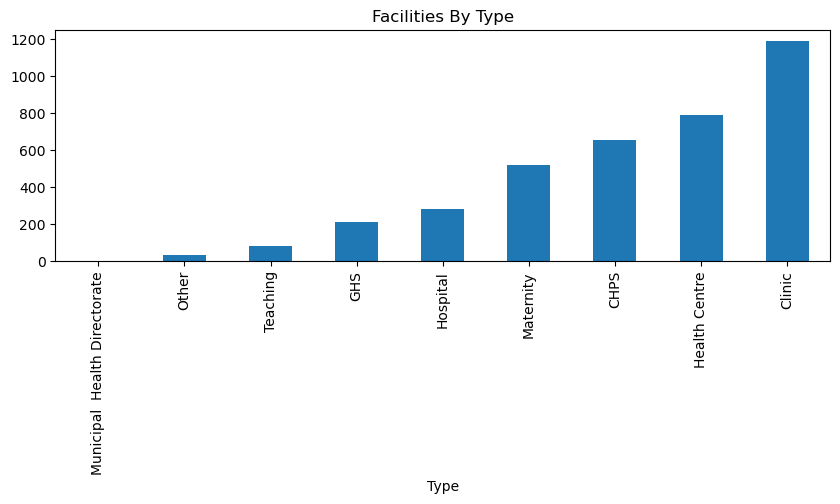

In [11]:
health_df.groupby('Type').count()['FacilityName'].sort_values().plot(
    kind='bar',
    title='Facilities By Type',
    figsize=(10,3),
)
plt.show()


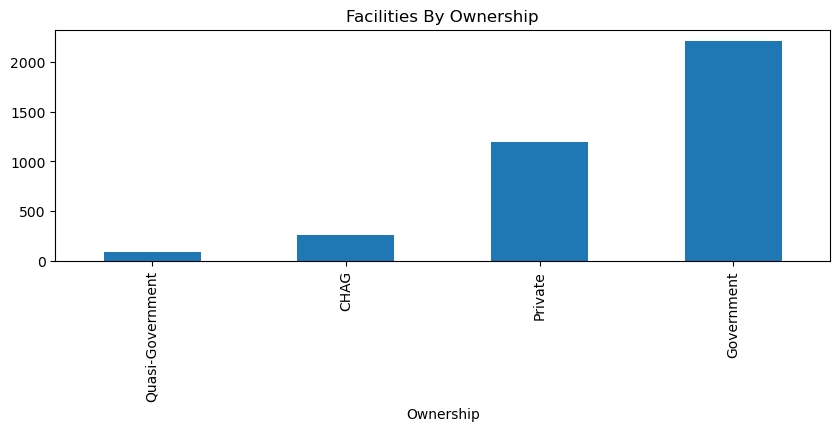

In [12]:
health_df.groupby('Ownership').count()['FacilityName'].sort_values().plot(
    kind='bar',
    title='Facilities By Ownership',
    figsize=(10,3)
)
plt.show()

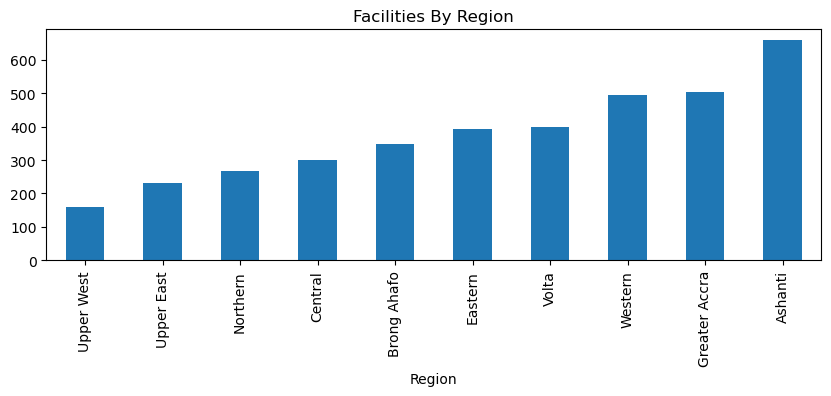

In [13]:
health_df.groupby('Region').count()['FacilityName'].sort_values().plot(
    kind='bar',
    title='Facilities By Region',
    figsize=(10,3)
)
plt.show()

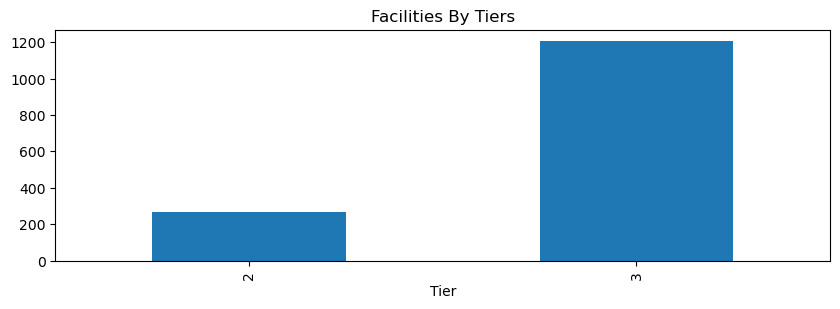

In [14]:

health_tiers_df.groupby('Tier').count()['Facility'].sort_values().plot(
    kind='bar',
    title='Facilities By Tiers',
    figsize=(10,3)
)
plt.show()


# Graphical Presentation

In [15]:
labels = health_df['Ownership'].value_counts().keys().tolist()
values = health_df['Ownership'].value_counts().values.tolist()
map = go.Pie(labels=labels, 
                values=values, 
                marker=dict(colors=['purple', 'green', 'tealrose', 'temps']), 
                hoverinfo='value')
data = [map]
layout = go.Layout(title='Facility Ownership')
fig = go.Figure(data = data,layout = layout)
fig.show()

In [16]:
fig = px.bar(health_df, x='Region', y='FacilityName', color='Type', barmode='group', height=350)
fig.update_layout(title='Facilities by Type')
fig.show()

In [17]:
fig = px.bar(health_tiers_df, x='Region', y='Tier', barmode='group', height=400, width=750)
fig.update_layout(title='Facilities by Tier')
fig.show()

# Data Mapping

In [18]:
health_df['FacilityName'] = health_df['FacilityName'].str.upper()
health_df

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E ZION CLINIC,Clinic,Afrancho,CHAG,7.408010,-1.963170
1,Ashanti,Bekwai Municipal,ABENKYIMAN CLINIC,Clinic,Anwiankwanta,Private,6.463120,-1.585920
2,Ashanti,Adansi North,ABOABO HEALTH CENTRE,Health Centre,Aboabo No 2,Government,6.223930,-1.349820
3,Ashanti,Afigya-Kwabre,ABOABOGYA HEALTH CENTRE,Health Centre,Aboabogya,Government,6.841770,-1.610980
4,Ashanti,Kwabre,ABOASO HEALTH CENTRE,Health Centre,Aboaso,Government,6.841770,-1.610980
...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,ACKAAKROM CHPS,CHPS,Ackaakrom,Government,6.041831,-2.875169
3752,Western,Sefwi-Akontombra,APPRUTU CHPS,CHPS,Apprutu,Government,6.041831,-2.875169
3753,Western,Sefwi-Akontombra,KOJOKROM CHPS,CHPS,Kojokrom,Government,6.041831,-2.875169
3754,Western,Sefwi-Akontombra,YAWKROM CHPS,CHPS,Yawkrom,Government,6.041831,-2.875169


In [19]:
#merge health-facilities and health-tiers data
merge_df=pd.merge(
    health_df, 
    health_tiers_df, 
    left_on=['FacilityName'],
    right_on=['Facility'],
    how='inner'
)
display(merge_df.head())
display(merge_df.tail())

,Region_x,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,Region_y,Facility,Tier
0,Ashanti,Bekwai Municipal,ABENKYIMAN CLINIC,Clinic,Anwiankwanta,Private,6.463120,-1.585920,Ashanti,ABENKYIMAN CLINIC,3
1,Ashanti,Obuasi Municipal,ALL SOULS CLINIC,Clinic,Akaporiso,Private,6.198520,-1.628810,Greater Accra,ALL SOULS CLINIC,3
2,Ashanti,Bosomtwe,GOD'S GRACE MATERNITY HOME,Maternity,Aputuagya,Private,6.501678,-1.414483,Ashanti,GOD'S GRACE MATERNITY HOME,3
3,Volta,Keta,GOD'S GRACE MATERNITY HOME,Maternity,NaN,Private,5.910702,0.991867,Ashanti,GOD'S GRACE MATERNITY HOME,3
4,Ashanti,Atwima-Mponua,BETHEL MATERNITY HOME,Maternity,Enyinamoso,Private,6.646920,-1.903270,Ashanti,BETHEL MATERNITY HOME,3


,Region_x,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,Region_y,Facility,Tier
224,Western,Tarkwa Nsuaem Municipal,HILL TOP CLINIC,Clinic,Kwaminakrom,Private,5.278620,-1.995060,Greater Accra,HILL TOP CLINIC,3
225,Western,Tarkwa Nsuaem Municipal,RABBONI CHRISTIAN HOSPITAL,Hospital,Commercial Street,Private,5.305540,-1.993020,Western,RABBONI CHRISTIAN HOSPITAL,2
226,Western,Juabeso,THE PROMISE OF GOD MATERNITY HOME,Maternity,NaN,Private,6.314808,-2.857711,Western,THE PROMISE OF GOD MATERNITY HOME,3
227,Western,Bibiani-Anhwiaso-Bekwai,DIVINE LOVE HOSPITAL,Hospital,NaN,Government,6.275227,-2.263039,Western,DIVINE LOVE HOSPITAL,2
228,Western,Jomoro,ANGEL CLINIC,Clinic,NaN,Private,5.179371,-2.658640,Western,ANGEL CLINIC,3


In [20]:
merge_df['Town']=merge_df['Town'].fillna('Unknown')
merge_df = merge_df.drop('Region_y', axis='columns')
merge_df = merge_df.drop('Facility', axis='columns')
merge_df.rename(columns={'Region_x':'Region'}, inplace=True)
display(merge_df.head())
display(merge_df.tail())

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,Tier
0,Ashanti,Bekwai Municipal,ABENKYIMAN CLINIC,Clinic,Anwiankwanta,Private,6.463120,-1.585920,3
1,Ashanti,Obuasi Municipal,ALL SOULS CLINIC,Clinic,Akaporiso,Private,6.198520,-1.628810,3
2,Ashanti,Bosomtwe,GOD'S GRACE MATERNITY HOME,Maternity,Aputuagya,Private,6.501678,-1.414483,3
3,Volta,Keta,GOD'S GRACE MATERNITY HOME,Maternity,Unknown,Private,5.910702,0.991867,3
4,Ashanti,Atwima-Mponua,BETHEL MATERNITY HOME,Maternity,Enyinamoso,Private,6.646920,-1.903270,3


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,Tier
224,Western,Tarkwa Nsuaem Municipal,HILL TOP CLINIC,Clinic,Kwaminakrom,Private,5.278620,-1.995060,3
225,Western,Tarkwa Nsuaem Municipal,RABBONI CHRISTIAN HOSPITAL,Hospital,Commercial Street,Private,5.305540,-1.993020,2
226,Western,Juabeso,THE PROMISE OF GOD MATERNITY HOME,Maternity,Unknown,Private,6.314808,-2.857711,3
227,Western,Bibiani-Anhwiaso-Bekwai,DIVINE LOVE HOSPITAL,Hospital,Unknown,Government,6.275227,-2.263039,2
228,Western,Jomoro,ANGEL CLINIC,Clinic,Unknown,Private,5.179371,-2.658640,3


In [21]:
merge_df.describe()

,Latitude,Longitude,Tier
count,229.000000,229.000000,229.000000
mean,6.315869,-0.791703,2.842795
std,1.236099,0.912203,0.364792
min,4.896730,-3.189590,2.000000
25%,5.592320,-1.603710,3.000000
50%,5.718660,-0.262400,3.000000
75%,6.690710,-0.173220,3.000000
max,11.054870,1.169100,3.000000


In [22]:
#graphical african map display
afr_map=px.scatter_geo(
    health_df,
    lat='Latitude',
    lon='Longitude',
    color='Type',
    scope='africa',
    color_continuous_scale='px.colors.cyclical.IceFire',
    title='Ghana Health Facilities By Type'
)
afr_map

In [23]:
#graphical african map display by Ownership
fig=px.scatter_geo(
    health_df,
    lat='Latitude',
    lon='Longitude',
    color='Ownership',
    scope='africa',
    color_continuous_scale='viridis',
    title='Ghana Health Facilities By Ownership'
)
fig

In [24]:
#graphical african map display by Tiers
#color options:tealrose,twilight,tempo,temps,thermal,tropic,turbid,turbo,viridis,ylgn,ylgnbu,ylorbr,ylorrd
fig_1=px.scatter_geo(
    merge_df,
    lat='Latitude',
    lon='Longitude',
    color='Tier',
    scope='africa',
    color_continuous_scale='ylorrd',
    title='Ghana Health Facilities By Tier'
)
fig_1